In [1]:
import pandas as pd
data = pd.read_csv("/groups/igonin/.seisbench/datasets/txed/metadata.csv")
events = data[data["trace_category"]!= "noise"]
events = events.drop_duplicates(subset=["source_origin_time"])
print("# Rows: ", len(data))
print("# Events: ", len(events))

/tmp/ipykernel_1645941/1033363382.py:2: DtypeWarning: Columns (7,10,12,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/groups/igonin/.seisbench/datasets/txed/metadata.csv")


# Rows:  519689
# Events:  21746


count    21746.000000
mean         1.836395
std          0.618124
min         -0.984848
25%          1.487815
50%          1.852763
75%          2.191963
max          5.432978
Name: source_magnitude, dtype: float64


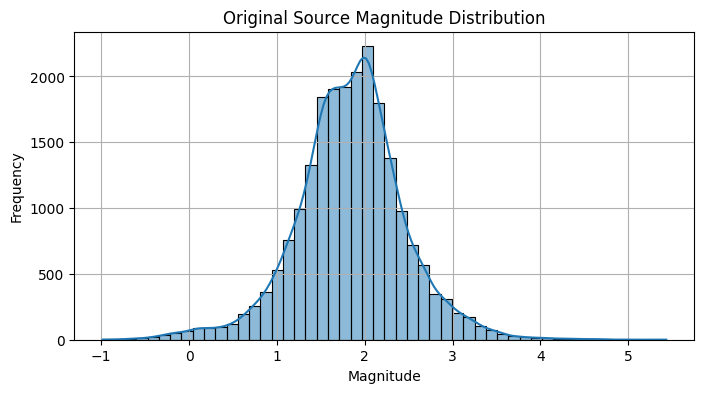

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

 
# Basic stats
print(events["source_magnitude"].describe())

# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(events["source_magnitude"], bins=50, kde=True)
plt.title("Original Source Magnitude Distribution")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

count    2.174600e+04
mean     2.300295e-16
std      1.000023e+00
min     -4.564311e+00
25%     -5.639459e-01
50%      2.648107e-02
75%      5.752502e-01
max      5.818683e+00
Name: source_magnitude_norm, dtype: float64


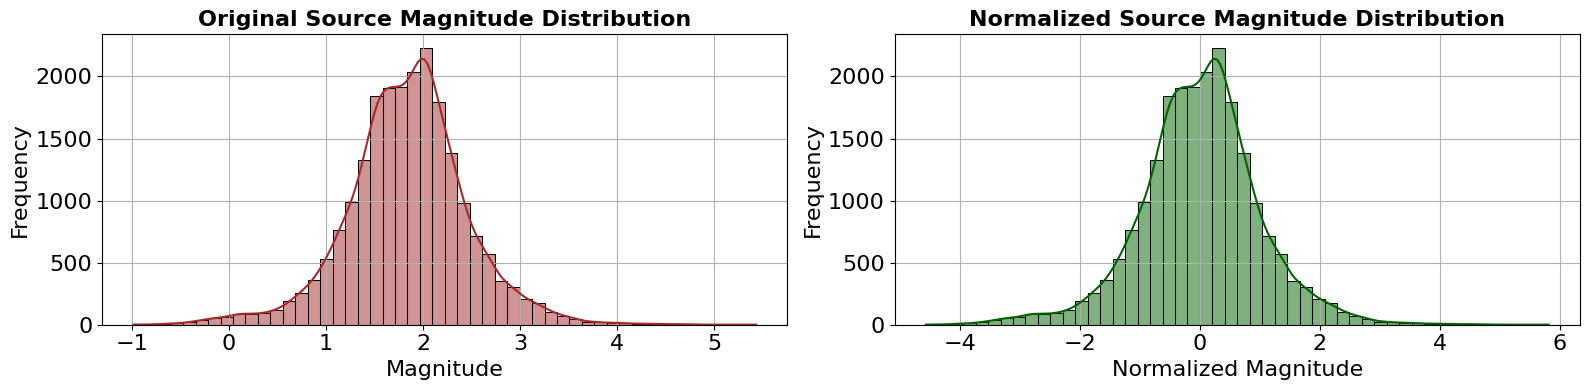

In [5]:
from sklearn.preprocessing import StandardScaler
import joblib

# Step 1: Initialize and fit the scaler
scaler = StandardScaler()
events["source_magnitude_norm"] = scaler.fit_transform(events[["source_magnitude"]])
# Step 2: Save the fitted scaler for future use
joblib.dump(scaler, "magnitude_scaler.pkl")


import matplotlib.pyplot as plt
import seaborn as sns

# Basic stats
print(events["source_magnitude_norm"].describe())

# Histogram
fig,axes = plt.subplots(1,2, figsize=(16, 4))
sns.histplot(events["source_magnitude"], bins=50, color="brown", kde=True,ax=axes[0])
sns.histplot(events["source_magnitude_norm"], bins=50, color="darkgreen", kde=True,ax=axes[1])
axes[0].set_title("Original Source Magnitude Distribution",fontsize=16,fontweight="bold")
axes[1].set_title("Normalized Source Magnitude Distribution",fontsize=16,fontweight="bold")
axes[0].set_xlabel("Magnitude",fontsize=16)
axes[1].set_xlabel("Normalized Magnitude",fontsize=16)
axes[0].set_ylabel("Frequency",fontsize=16)
axes[1].set_ylabel("Frequency",fontsize=16)
axes[0].tick_params(axis='both', labelsize=16)
axes[1].tick_params(axis='both', labelsize=16)
axes[0].grid(True)
axes[1].grid(True)
plt.tight_layout()
plt.savefig("magnitude_scaler.png",dpi=300)
plt.show()

In [21]:
def normalize_magnitude(mag_array, scaler_path="magnitude_scaler.pkl"):
    scaler = joblib.load(scaler_path)
    return scaler.transform(mag_array)

def denormalize_magnitude(norm_array, scaler_path="magnitude_scaler.pkl"):
    scaler = joblib.load(scaler_path)
    return scaler.inverse_transform(norm_array)

In [22]:
events[["source_magnitude", "source_magnitude_norm"]].describe()

,source_magnitude,source_magnitude_norm
count,21746.000000,2.174600e+04
mean,1.836395,2.300295e-16
std,0.618124,1.000023e+00
min,-0.984848,-4.564311e+00
25%,1.487815,-5.639459e-01
50%,1.852763,2.648107e-02
75%,2.191963,5.752502e-01
max,5.432978,5.818683e+00


In [23]:
test = events["source_magnitude_norm"].to_numpy().reshape(-1, 1)
denorm_test = denormalize_magnitude(test).flatten()
# Check if the denormalized values match the original values
print("Original values: ", events["source_magnitude"].head())
print("Denormalized values: ", denorm_test[:5])
# Plotting the normalized and denormalized values
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.hist(events["source_magnitude_norm"], bins=50, color='blue', alpha=0.7)
# plt.title("Normalized Source Magnitude Distribution")
# plt.xlabel("Normalized Magnitude")
# plt.ylabel("Frequency")
# plt.grid(True)

Original values:  207458    1.971929
207468    1.901215
207484    2.197399
207502    2.200807
207508    1.266991
Name: source_magnitude, dtype: float64
Denormalized values:  [1.9719295  1.90121526 2.19739925 2.2008073  1.26699133]
